In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
# Load dataset California Housing
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)
 
# Normalisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
 
# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [3]:
# Inisialisasi model Decision Tree Regressor
model = DecisionTreeRegressor(max_depth=50, random_state=42)
 
# Melatih model dengan data latih
model.fit(X_train, y_train)
 
# Membuat prediksi untuk data latih dan data uji
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [4]:
# Menghitung Mean Squared Error (MSE) untuk data latih dan data uji
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
 
# Menampilkan hasil MSE
print(f'Training MSE: {train_mse}')
print(f'Test MSE: {test_mse}')

Training MSE: 9.904697258622977e-32
Test MSE: 0.5265256772490148


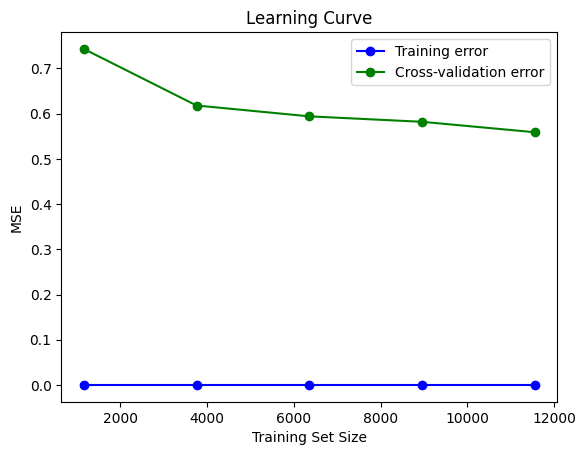

In [5]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
 
# Menghitung learning curve
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
 
# Menghitung rata-rata dan standar deviasi
train_mean = -np.mean(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)
 
# Plot learning curve
plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Training error")
plt.plot(train_sizes, test_mean, 'o-', color="green", label="Cross-validation error")
plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("MSE")
plt.legend()
plt.show()